In [1]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nyc_sales_binned.csv')
data.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR TYPE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3037,42,,A1,4428 PARK AVENUE,,...,0,1,3525,1340,1899,1,A1,287000,2010-12-10 00:00:00,PRE PRE-WAR
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,64,,A1,467 EAST 185 STREET,,...,0,1,1667,1296,1910,1,A1,150000,2010-04-20 00:00:00,PRE PRE-WAR
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,34,,A1,2085 BATHGATE AVENUE,,...,0,1,2060,1629,1899,1,A1,145915,2010-07-27 00:00:00,PRE PRE-WAR
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,42,,A1,2069 BATHGATE AVENUE,,...,0,1,1964,1424,1899,1,A1,72790,2010-06-03 00:00:00,PRE PRE-WAR
4,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,18,,A9,2184 BATHGATE AVENUE,,...,0,1,1768,1236,1930,1,A9,313300,2010-04-09 00:00:00,PRE-WAR
5,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,19,,A5,2186 BATHGATE AVENUE,,...,0,1,1768,1188,1901,1,A5,299000,2010-06-30 00:00:00,PRE PRE-WAR
6,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,19,,A5,2186 BATHGATE AVENUE,,...,0,1,1768,1188,1901,1,A5,132000,2010-02-23 00:00:00,PRE PRE-WAR
7,2,BATHGATE,01 ONE FAMILY HOMES,1,3048,28,,A1,540 EAST 182 STREET,,...,0,1,1209,1048,1901,1,A1,272231,2010-10-04 00:00:00,PRE PRE-WAR
8,2,BATHGATE,02 TWO FAMILY HOMES,1,3030,60,,B3,4469 PARK AVENUE,,...,0,2,1542,1542,1899,1,B3,88218,2010-01-27 00:00:00,PRE PRE-WAR
9,2,BATHGATE,02 TWO FAMILY HOMES,1,3030,71,,B2,4443 PARK AVENUE,,...,0,2,2352,1632,1899,1,B2,280000,2010-02-23 00:00:00,PRE PRE-WAR


In [3]:
data["BOROUGH"] = data["BOROUGH"].astype('category')
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')

In [4]:
#remove duplicates and check that it worked
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [5]:
#check number of rows and columns
data.shape

(190699, 22)

In [6]:
data.corr()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.000000,0.038959,0.473909,-0.040559,-0.089891,-0.041447,0.003588,-0.039476,0.088689,-0.042278
LOT,0.038959,1.000000,-0.090810,-0.008401,-0.028698,-0.008708,0.003544,-0.008795,0.079750,-0.008311
ZIP CODE,0.473909,-0.090810,1.000000,-0.048019,-0.104358,-0.049040,-0.026182,-0.048245,-0.138520,-0.049154
RESIDENTIAL UNITS,-0.040559,-0.008401,-0.048019,1.000000,0.380229,0.999931,0.659252,0.899368,-0.000108,0.784236
COMMERCIAL UNITS,-0.089891,-0.028698,-0.104358,0.380229,1.000000,0.390553,0.312866,0.433772,-0.041225,0.386101
TOTAL UNITS,-0.041447,-0.008708,-0.049040,0.999931,0.390553,1.000000,0.659968,0.900418,-0.000605,0.785232
LAND SQUARE FEET,0.003588,0.003544,-0.026182,0.659252,0.312866,0.659968,1.000000,0.794457,0.015593,0.502908
GROSS SQUARE FEET,-0.039476,-0.008795,-0.048245,0.899368,0.433772,0.900418,0.794457,1.000000,0.004421,0.846223
YEAR BUILT,0.088689,0.079750,-0.138520,-0.000108,-0.041225,-0.000605,0.015593,0.004421,1.000000,-0.004863
SALE PRICE,-0.042278,-0.008311,-0.049154,0.784236,0.386101,0.785232,0.502908,0.846223,-0.004863,1.000000


# CLEAN OUTLIERS

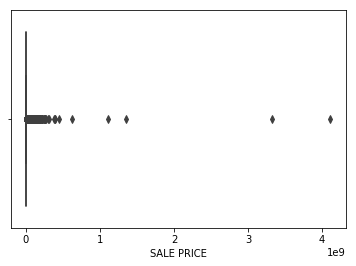

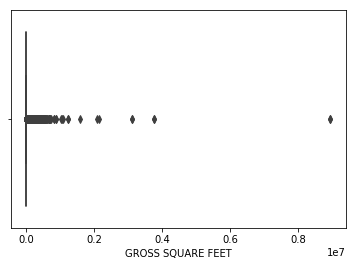

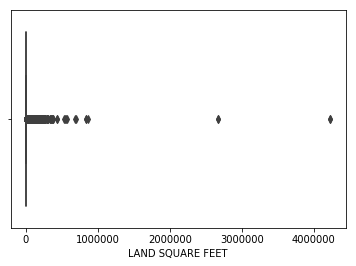

In [7]:
sns.boxplot(x="SALE PRICE", data=data)
plt.show()
sns.boxplot(x="GROSS SQUARE FEET", data=data)
plt.show()
sns.boxplot(x="LAND SQUARE FEET", data=data)
plt.show()

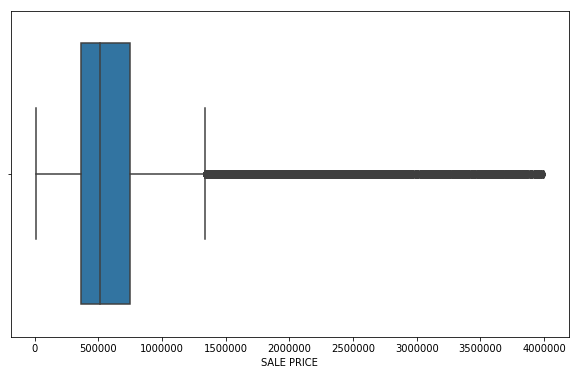

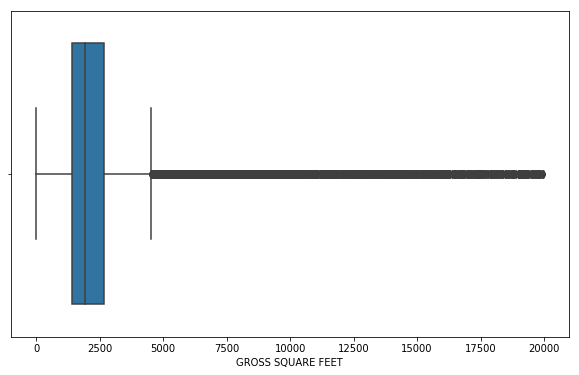

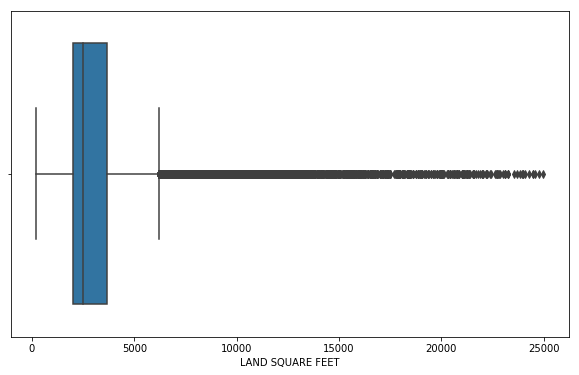

In [8]:
data = data[data["SALE PRICE"]<4000000]
data = data[data["GROSS SQUARE FEET"]<20000]
data = data[data["LAND SQUARE FEET"]<25000]
plt.figure(figsize=(10,6))
sns.boxplot(x="SALE PRICE", data=data)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="GROSS SQUARE FEET", data=data)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="LAND SQUARE FEET", data=data)
plt.show()

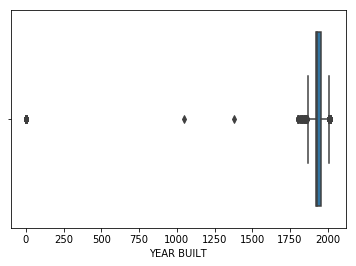

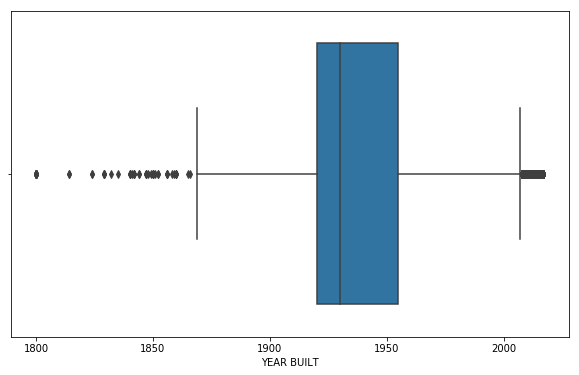

In [9]:
sns.boxplot(x="YEAR BUILT", data=data)
plt.show()
data = data[data["YEAR BUILT"]>1750]
plt.figure(figsize=(10,6))
sns.boxplot(x="YEAR BUILT", data=data)
plt.show()

In [10]:
data.shape

(183102, 22)

/Users/tamir/miniconda2/envs/PointUp/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


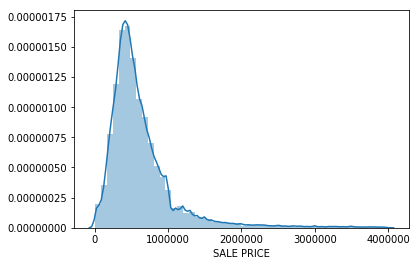

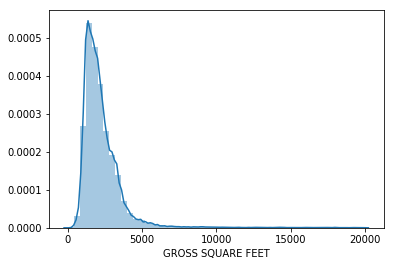

In [11]:
sns.distplot(data["SALE PRICE"])
plt.show()
sns.distplot(data["GROSS SQUARE FEET"])
plt.show()

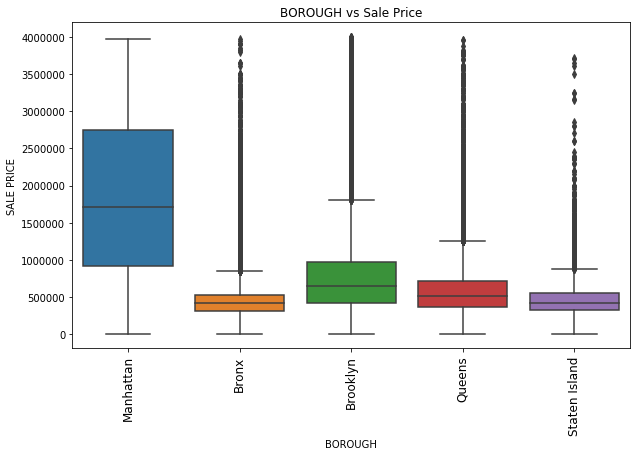

In [12]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=data)
ax.set_xticklabels(["Manhattan","Bronx","Brooklyn","Queens","Staten Island"], rotation='vertical', fontsize = 12)
plt.title('BOROUGH vs Sale Price')
plt.show()

In [13]:
data = data.sample(frac=1).reset_index(drop=True)

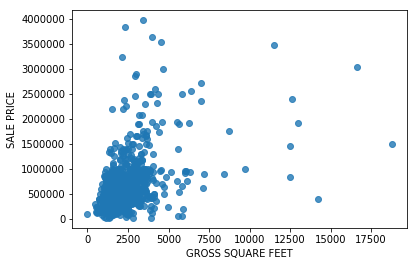

In [14]:
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=data.iloc[:1000], fit_reg=False)
plt.show()

In [15]:
data["NEIGHBORHOOD"].value_counts()

FLUSHING-NORTH               4868
BEDFORD STUYVESANT           4737
EAST NEW YORK                3118
BUSHWICK                     2839
SO. JAMAICA-BAISLEY PARK     2750
BAYSIDE                      2703
RICHMOND HILL                2638
ST. ALBANS                   2544
SOUTH JAMAICA                2472
BOROUGH PARK                 2336
GREAT KILLS                  2294
CANARSIE                     2229
QUEENS VILLAGE               2209
FLATBUSH-EAST                2206
SPRINGFIELD GARDENS          2145
CROWN HEIGHTS                2049
SOUTH OZONE PARK             1963
FLUSHING-SOUTH               1917
ASTORIA                      1862
OZONE PARK                   1835
BAY RIDGE                    1833
OCEAN HILL                   1727
HOLLIS                       1677
BENSONHURST                  1661
CORONA                       1647
WOODHAVEN                    1633
GRAVESEND                    1610
MIDDLE VILLAGE               1596
ELMHURST                     1582
SUNSET PARK   

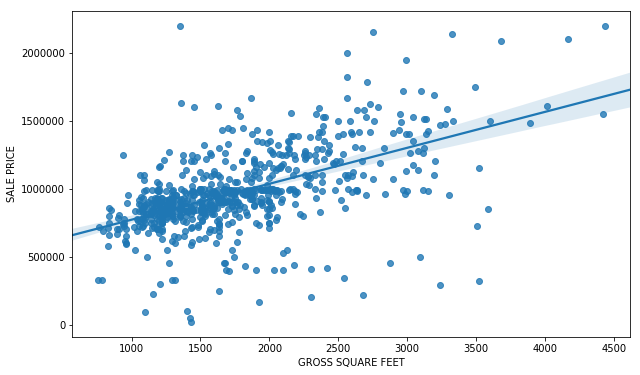

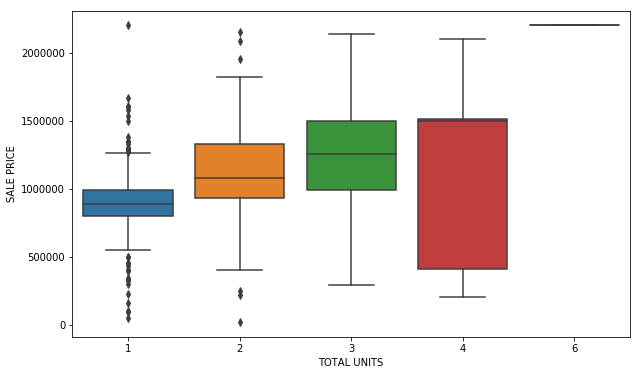

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=data[data["NEIGHBORHOOD"]=="FLUSHING-NORTH"])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x="TOTAL UNITS", y="SALE PRICE", data=data[data["NEIGHBORHOOD"]=="FLUSHING-NORTH"])
plt.show()

correlation between TOTAL UNITS and RESIDENTIAL UNITS:  0.994587612364003


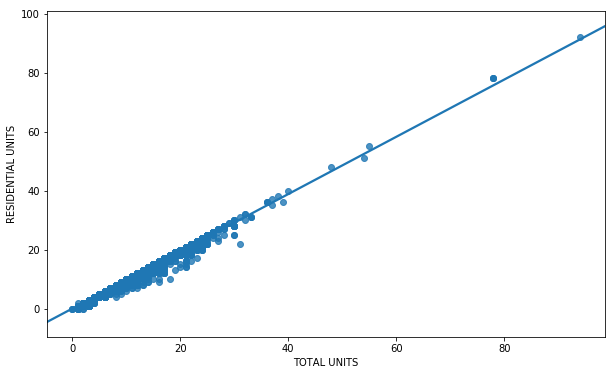

In [17]:
print("correlation between TOTAL UNITS and RESIDENTIAL UNITS: ", data["TOTAL UNITS"].corr(data["RESIDENTIAL UNITS"]))
plt.figure(figsize=(10,6))
sns.regplot(x="TOTAL UNITS", y="RESIDENTIAL UNITS", data=data)
plt.show()

In [18]:
data = data.drop(columns=["RESIDENTIAL UNITS"])

In [19]:
data = data.drop(columns=["EASE-MENT"])

In [20]:
data = data.drop(columns=["ZIP CODE"])

In [21]:
data.describe()

,BLOCK,LOT,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,183102.000000,183102.000000,183102.000000,183102.000000,183102.000000,183102.000000,183102.000000,1.831020e+05
mean,5714.042747,61.492709,0.035647,2.029284,2962.802962,2272.668474,1939.967461,6.324593e+05
std,3769.563974,118.331819,0.217054,2.042940,1683.262632,1538.224660,30.391160,4.826704e+05
min,3.000000,1.000000,0.000000,0.000000,200.000000,1.000000,1800.000000,1.000100e+04
25%,2858.250000,20.000000,0.000000,1.000000,2000.000000,1430.000000,1920.000000,3.600000e+05
50%,5124.000000,39.000000,0.000000,2.000000,2500.000000,1935.000000,1930.000000,5.100000e+05
75%,7987.750000,64.000000,0.000000,2.000000,3684.750000,2674.750000,1955.000000,7.500000e+05
max,16322.000000,4336.000000,9.000000,94.000000,24989.000000,19969.000000,2017.000000,3.995000e+06


In [22]:
queens = data[data["NEIGHBORHOOD"]=="FLUSHING-NORTH"]
queens.corr()

,BLOCK,LOT,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.000000,-0.044041,0.008591,-0.007246,-0.159227,-0.092249,0.047383,-0.059082
LOT,-0.044041,1.000000,0.279405,0.049669,-0.153088,0.063699,0.004655,-0.025708
COMMERCIAL UNITS,0.008591,0.279405,1.000000,0.153734,-0.098318,0.125586,0.006936,0.032455
TOTAL UNITS,-0.007246,0.049669,0.153734,1.000000,-0.150309,0.634956,0.273723,0.404830
LAND SQUARE FEET,-0.159227,-0.153088,-0.098318,-0.150309,1.000000,0.112296,-0.173303,0.250613
GROSS SQUARE FEET,-0.092249,0.063699,0.125586,0.634956,0.112296,1.000000,0.240585,0.548497
YEAR BUILT,0.047383,0.004655,0.006936,0.273723,-0.173303,0.240585,1.000000,0.172484
SALE PRICE,-0.059082,-0.025708,0.032455,0.404830,0.250613,0.548497,0.172484,1.000000


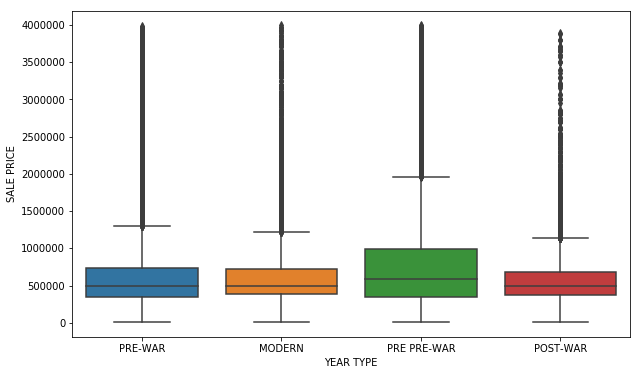

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x="YEAR TYPE", y="SALE PRICE", data=data)
plt.show()

In [24]:
data.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,YEAR TYPE
0,4,ST. ALBANS,01 ONE FAMILY DWELLINGS,1,11002,208,A1,113-14 207 STREET,,0,1,3000,1792,1925,1,A1,390000,2014-05-30,PRE-WAR
1,4,CORONA,02 TWO FAMILY DWELLINGS,1,1609,38,B3,100-11 40 ROAD,,0,2,2500,2280,1920,1,B3,500000,2013-10-04,PRE-WAR
2,3,WILLIAMSBURG-EAST,02 TWO FAMILY HOMES,1,3088,26,B2,91 SEIGEL STREET,,0,2,2500,2000,1996,1,B2,535000,2011-01-10,MODERN
3,3,RED HOOK,01 ONE FAMILY DWELLINGS,1,585,49,A4,184 COFFEY STREET,,0,1,1500,2183,1899,1,A4,2206000,2015-05-22,PRE PRE-WAR
4,4,FLUSHING-NORTH,01 ONE FAMILY HOMES,1,5533,1,A1,189-28 46TH ROAD,,0,1,5343,1704,1960,1,A1,700000,2012-12-03,POST-WAR
5,3,BOROUGH PARK,07 RENTALS - WALKUP APARTMENTS,1,5507,39,C0,5808 21ST AVENUE,,0,3,2475,3280,1931,2,C3,1300000,2013-06-10,PRE-WAR
6,3,CANARSIE,01 ONE FAMILY DWELLINGS,1,8142,75,A1,9225 FARRAGUT ROAD,,0,1,2000,1060,1920,1,A1,495000,2017-10-30,PRE-WAR
7,5,ELTINGVILLE,01 ONE FAMILY HOMES,1,5645,3,A9,273 ANNADALE ROAD,,0,1,2772,1140,1978,1,A9,300000,2012-01-17,POST-WAR
8,4,MASPETH,02 TWO FAMILY DWELLINGS,1,2756,27,B3,62-18 59 DRIVE,,0,2,2000,1280,1925,1,B3,519000,2013-05-09,PRE-WAR
9,5,HUGUENOT,01 ONE FAMILY DWELLINGS,1,6850,78,A2,673 SHELDON AVENUE,,0,1,3895,1820,1965,1,A2,445000,2015-01-12,POST-WAR


In [28]:
data["TAX CLASS AT PRESENT"].value_counts()

1     170856
2A      7945
2B      2341
2       1894
4         39
2C        27
1D         0
Name: TAX CLASS AT PRESENT, dtype: int64

In [27]:
data["TAX CLASS AT TIME OF SALE"].unique()

[1, 2]
Categories (2, int64): [1, 2]

In [29]:
data["BUILDING CLASS AT TIME OF SALE"].value_counts()

A1    32129
A5    25982
B2    21484
B1    20064
C0    17764
B3    17729
A2    12849
B9     6828
A9     6546
C3     4074
C2     3617
S2     3277
C1     2485
A0     1848
A3     1560
S1     1519
A4      861
C7      719
C5      614
C4      431
A6      415
D1       65
C6       50
C9       44
S0       44
A7       30
D7       25
D6       18
D9       13
D3        7
D5        5
D4        3
D2        1
C8        1
R4        1
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

In [31]:
data.to_csv("binned_clean.csv")